In [1]:
import tensorflow as tf
from tensorflow.python.platform import gfile
from google.protobuf import json_format
import json

In [2]:
with tf.Session() as sess:

    with tf.gfile.GFile("frozen.pb", 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        tf.import_graph_def(graph_def)
        str_json = json_format.MessageToJson(graph_def)


In [3]:
d = json.loads(str_json)

In [4]:
length_nodes = len(d['node'])

In [5]:
for i in range(length_nodes):
    if 'value' in (d['node'][i]['attr'].keys()):        
        del d['node'][i]['attr']['value']['tensor']['tensorContent']

In [11]:
d['node'][5]

{'attr': {'T': {'type': 'DT_FLOAT'},
  'transpose_a': {'b': False},
  'transpose_b': {'b': False}},
 'input': ['X', 'dense/kernel/read'],
 'name': 'model/dense/MatMul',
 'op': 'MatMul'}

In [7]:
import networkx as nx

In [41]:
G = nx.Graph()
for i in range(length_nodes):
    node_name = d['node'][i]['name']
    G.add_node(node_name)
    if 'input' in list(d['node'][i].keys()):
        inputs = d['node'][i]['input']
        for j in inputs:
            G.add_edge(node_name, j)

In [16]:
G.number_of_nodes()

24

In [17]:
import matplotlib.pyplot as plt

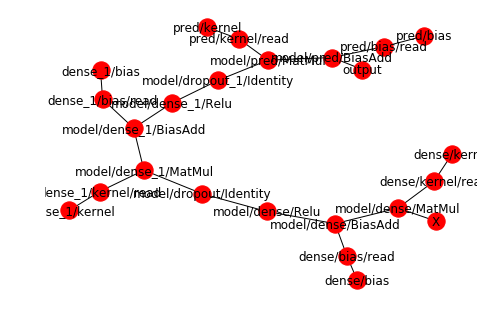

In [42]:
nx.draw(G, with_labels=True)

In [34]:
d['node'][1]

{'attr': {'dtype': {'type': 'DT_FLOAT'},
  'value': {'tensor': {'dtype': 'DT_FLOAT',
    'tensorShape': {'dim': [{'size': '784'}, {'size': '256'}]}}}},
 'name': 'dense/kernel',
 'op': 'Const'}